In [33]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
rating = pd.read_csv('./ml-latest-small/ratings.csv')
movies = pd.read_csv('./ml-latest-small/movies.csv')
links = pd.read_csv('./ml-latest-small/links.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

### QUESTION 1: Compute the sparsity of the movie rating dataset, where sparsity is defined by

Sparsity = Total number of available ratings / Total number of possible ratings (1)

In [32]:
available_rating = rating.drop_duplicates(subset = ['movieId', 'userId']).shape[0]
possible_rating = pd.unique(movies['movieId']).shape[0] * pd.unique(rating['userId']).shape[0]
sparsity = available_rating * 1.0 / possible_rating 
print('Sparsity of rating dataset is %0.5f' % sparsity)

Sparsity of rating dataset is 0.01697


### Plot a histogram showing the frequency of the rating values.

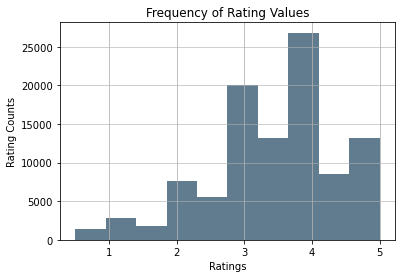

In [50]:
rating['rating'].plot.hist(grid=True, bins=10, color='#607c8e')
plt.title('Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Rating Counts')
plt.grid(axis='y', alpha=0.75)

Most of the ratings are greater than or equal to 3.0. 4.0 is the mode of ratings. People refer to rate movie by the multiple of 1 instead of 0.5.

### QUESTION 3: Plot the distribution of the number of ratings received among movies.

Text(0, 0.5, 'Rating Counts')

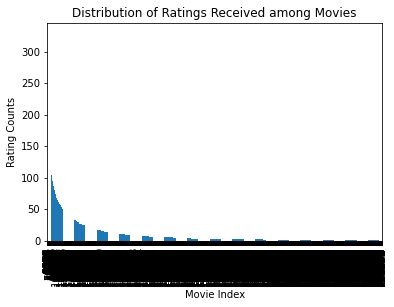

In [58]:
rating.movieId.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of Ratings Received among Movies')
plt.xlabel('Movie Index')
plt.ylabel('Rating Counts')

### Q4 Plot the distribution of ratings among users

Text(0, 0.5, 'Rating Counts')

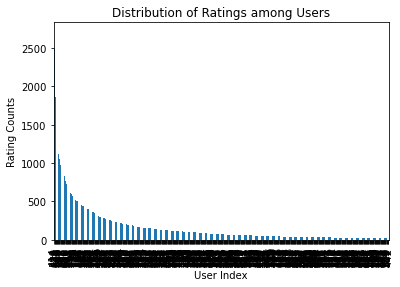

In [59]:
rating.userId.value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of Ratings among Users')
plt.xlabel('User Index')
plt.ylabel('Rating Counts')

### QUESTION 5: Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.


This indicates that both ratings received per movie and ratings per user have lots of long tail data. Namely, only very few movie, say less than 10% received high volume of ratings and only very few users provide high volume of ratings. Most movies only have very few ratings and most users only have very few ratings. 

Movies in the right side of graph are less rated than the those in left side. This means that there are much more sparsity or unobserved areas for those items in ratings matrix. This can cause a recommender system which relies on neighborhood algorithms produce bad results.

### QUESTION 6: Compute the variance of the rating values received by each movie.

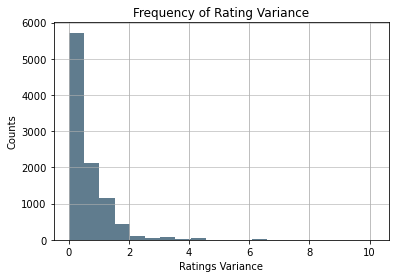

In [77]:
movie_var = rating.groupby(['movieId'])['rating'].var().reset_index()
movie_var = movie_var.fillna(0)

movie_var['rating'].plot.hist(grid=True, bins=20, color='#607c8e')
plt.title('Frequency of Rating Variance')
plt.xlabel('Ratings Variance')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Most of 

In [67]:
movie_var['rating'].isna().sum()

3446

In [70]:
valuecount = rating['movieId'].value_counts().reset_index()
valuecount[valuecount['movieId'] == 1].shape

(3446, 2)